#**4장. 분류하는 뉴런을 만듭니다.** - 이진분류

##**04-1 초기 인공지능 알고리즘과 로지스틱 회귀를 알아봅니다.**

**퍼셉트론**  
03장에서 배운 선형회귀와 유사한 구조 가짐<br>
하지만 퍼셉트론은 마지가 단계에서 샘플을 이진 분류하기 위해 계단 함수 사용(이것이 차이점!)

**로지스틱 회귀**<br>
활성화 함수는 비선형 함수 사용

##**04-4 분류용 데이터 세트를 준비힙니다.**

###**유방암 데이터 세트를 소개합니다.**

In [44]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [45]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [46]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

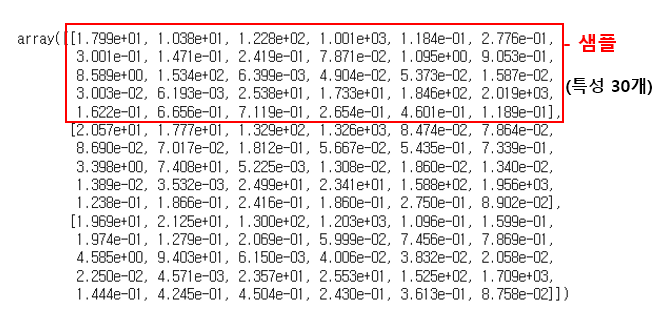

boxplot으로 사분위 관찰

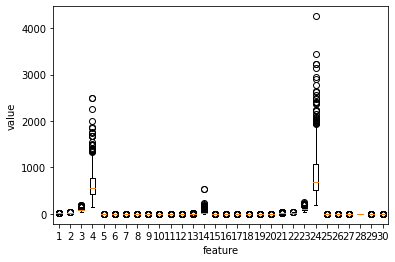

In [47]:
import matplotlib.pyplot as plt
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

눈에 띄는 특성 살펴보기

In [48]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

타깃 데이터 확인하기

In [49]:
import numpy as np
np.unique(cancer.target, return_counts=True) # cancer_target에 들어있는 값은 0 또는 1이라는 뜻

(array([0, 1]), array([212, 357]))

In [50]:
# 훈련 데이터 세트 저장
x = cancer.data
y = cancer.target

##**04-5 로지스틱 회귀를 위한 뉴런을 만듭니다.**

###**모델의 성능 평가를 위한 훈련 세트와 테스트 세트 나누기**

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify = y, test_size = 0.2, random_state = 42)

**stratify - 훈련데이터 나눌 때 비율 동일하게 만드는 것, 불균형한 경우 stratify를 y로 지정해주어야 함**<br>

In [53]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [54]:
# unique() 함수로 훈련 세트의 타깃 확인하기
np.unique(y_train, return_counts = True)

(array([0, 1]), array([170, 285]))

양성 클래스가 음성 클래스보다 1.7배 정도 많음

###**로지스틱 회귀 구현하기**

In [55]:
class LogisticNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.w + self.b)
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

In [56]:
# 넘파이 특성 참고
a = np.array([1,2,3])
b = np.array([3,4,5])
print(a + b)
print(a * b)

[4 6 8]
[ 3  8 15]


###**훈련하는 메서드 구현하기**

In [57]:
def fit(self, x, y, epochs = 100):
  self.w = np.ones(x.shape[1])    # 가중치 초기화
  self.b = 0                      # 절편 초기화
  for i in range(epochs):         # epochs 만큼 반복
    for x_i, y_i in zip(x,y):     # 모든 샘플에 대해 반복
      z = self.forpass(x_i)       # 정방향 계산
      a = self.activation(z)      # 활성화 함수 적용
      err = -(y_i - a)            # 오차 계산
      w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
      self.w -= w_grad            # 가중치 업데이트 
      self.b -= b_grad            # 절편 업데이트

In [58]:
def activation(self, z):
  a = 1 / (1+ np.exp(-z)) # 시그모이드 계산
  return a

np.exp()는 자연 상수의 지수함수

In [59]:
# numpy 공부하기
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [60]:
np.full((2,3),7)

array([[7, 7, 7],
       [7, 7, 7]])

###**예측하는 메서드 구현하기**

In [61]:
def predict(self, x):
  z = [self.forpass(x_i) for x_i in x]  # 선형 함수 적용
  a = self.activation(np.array(z))      # 활성화 함수 적용
  return a> 0.5                         # 계단 함수 적용

###**구현 내용 한눈에 보기**

In [62]:
class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b     # 직선 방정식 계산
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)        # 안전한 np.exp() 계산을 위해
    a = 1 / (1 + np.exp(-z))          # 시그모이드 계산
    return a

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
    self.b = 0                        # 절편을 초기화합니다.
    for i in range(epochs):           # epochs만큼 반복합니다.
      for x_i, y_i in zip(x, y):      # 모든샘플에 대해 반복합니다.
        z = self.forpass(x_i)         # 정방향 계산
        a = self.activation(z)        # 활성화 함수 적용
        err = -(y_i - a)              # 오차 계산
        w_grad, b_grad = self.backprop(x_i, err)      # 역방향 계산
        self.w -= w_grad              # 가중치 업데이트
        self.b -= b_grad              # 절편 업데이트

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]      # 정방향 계산
    a = self.activation(np.array(z))          # 활성화 함수 적용
    return a > 0.5


###**모델 훈련**

In [63]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

###**테스트 세트 사용해 모델의 정확도 평가하기**

In [64]:
np.mean(neuron.predict(x_test) == y_test)

0.8245614035087719

##**04-6 로지스틱 회귀 뉴런으로 단일층 신경망을 만듭니다.**

###**일반적인 신경망의 모습**

####**단일층 신경망에 single layer 추가 + 매 에포크마다 훈련 세트의 샘플 순서를 섞어 사용하기 + score 함수 추가**

In [66]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b     # 직선 방정식 계산
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)        # 안전한 np.exp() 계산을 위해
    a = 1 / (1 + np.exp(-z))          # 시그모이드 계산
    return a

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
    self.b = 0                        # 절편을 초기화합니다.
    for i in range(epochs):           # epochs만큼 반복합니다.
      loss = 0
      indexs = np.random.permutation(np.arange(len(x)))   # 인덱스를 섞습니다.
      for i in indexs:                # 모든샘플에 대해 반복합니다.
        z = self.forpass(x[i])         # 정방향 계산
        a = self.activation(z)        # 활성화 함수 적용
        err = -(y[i] - a)              # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)      # 역방향 계산
        self.w -= w_grad              # 가중치 업데이트
        self.b -= b_grad              # 절편 업데이트
        a = np.clip(a, 1e-10, 1-1e-10)# 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다.
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a)) # 에포크마다 평균 손실을 저장합니다.
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]      # 정방향 계산
    return np.array(z) > 0                    # 계단 함수 적용

  def score(self, x, y):
    return np.mean(self.predict(x) == y)


###**단일층 신경망 훈련하기**

In [67]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9298245614035088

###**손실함수 누적값 확인**

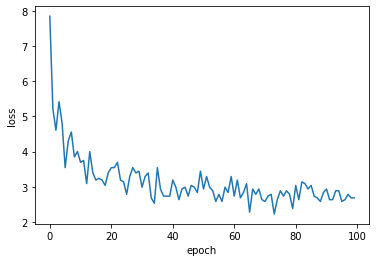

In [68]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##**04-7 사이킷런으로 로지스틱 회귀를 수행합니다.**

###**사이킷런으로 경사하강법 적용하기**

####**1. 로지스틱 손실 함수 지정하기**

In [69]:
 from sklearn.linear_model import SGDClassifier
 sgd = SGDClassifier(loss = 'log', max_iter = 100, tol = 1e-3, random_state = 42) # 반복할때마다 로지스틱 손실 함수의 값이 tol에 지정한 값만큼 감소되지 않으면 반복을 중단하도록 설정

####**2. 사이킷런으로 훈련하고 평가하기**

In [70]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

####**사이킷런으로 예측하기**

In [71]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])